In [202]:
import base64,os
import configparser
from typing import List
from langchain_openai import AzureChatOpenAI


config = configparser.ConfigParser()
config.read('config.properties')

APIKey = 'xxxxxxxxxxxx'
# APIKey=base64.b64decode(APIKey).decode('utf-8')
Endpoint = 'xxxxxxxxxx'
Deployment = 'xxxxxxxxxxxx'
version = 'xxxxxxxxx'
EmbeddingDeployment = 'xxxxxxxxxxxx'
os.environ["OPENAI_API_TYPE"] = 'xxxxxxxxxxxx'
os.environ["OPENAI_API_VERSION"] = "xxxxxxxxx"
os.environ["azure_endpoint"] = Endpoint
os.environ["AZURE_OPENAI_API_KEY"] = APIKey


In [203]:
from langchain_core.tools import tool


@tool
def add(a: int, b: int) -> int:
    """Adds a and b. with 9

    Args:
        a: first int
        b: second int
    """
    return a + b + 9


@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b


tools = [add, multiply]

In [204]:
llm = AzureChatOpenAI(temperature=.3,
                    azure_endpoint='xxxxxxxxxxx',
                    api_key='xxxxxxxxxx',
                    deployment_name='XXXXXXXX',
                    openai_api_version=version
    )
llm_with_tools = llm.bind_tools(tools)

In [205]:
query = " what is 11 + 49?"

x = llm_with_tools.invoke(query)

In [206]:
import pprint as pp

In [207]:
from langchain_core.messages import HumanMessage, ToolMessage


@tool
def magicadd(a: int, b: int) -> int:
    """magicadd a and b its not iple add but  .

    Args:
        a: first int
        b: second int
    """
    return a + b -8


@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b


tools = [magicadd, multiply]
llm_with_tools = llm.bind_tools(tools)

In [208]:
llm_with_tools.invoke(
    "Whats 119 magicadd 8 . Don't do any math yourself, only use tools for math. Respect order of operations"
)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_QI3gllUBbV1P5EOFm6hKjzq1', 'function': {'arguments': "const { magicadd } = require('./tools');\n\nconsole.log(magicadd({a: 119, b: 8}));", 'name': 'python'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 163, 'total_tokens': 194}, 'model_name': 'gpt-35-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-f2e2810f-9d57-4e9e-8d4a-97bcf885f3fa-0', invalid_tool_calls=[{'name': 'python', 'args': "const { magicadd } = require('./tools');\n\nconsole.log(magicadd({a: 119, b: 8}));", 'id': 'call_QI3gllUBbV1P5EOFm6hKjzq1', 'error': "Function python arguments:\n\nconst { magicadd } = require('./tools');\n\nconsole.log(magicadd({a: 119, b: 8}));\n\nare not valid JSON. Received JSONDecodeError Expecting value: line 1 column 1 (char 0)"}])

In [209]:
from langchain_core.messages import AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

examples = [
    HumanMessage(
        "What's the product of 317253 and 128472 plus four", name="example_user"
    ),
    AIMessage(
        "",
        name="example_assistant",
        tool_calls=[
            {"name": "multiply", "args": {"x": 317253, "y": 128472}, "id": "1"}
        ],
    ),
    ToolMessage("16505054784", tool_call_id="1"),
    AIMessage(
        "",
        name="example_assistant",
        tool_calls=[{"name": "add", "args": {"x": 16505054784, "y": 4}, "id": "2"}],
    ),
    ToolMessage("16505054788", tool_call_id="2"),
    AIMessage(
        "The product of 317253 and 128472 plus four is 16505054788",
        name="example_assistant",
    ),
]

system = """You are bad at math but are an expert at using a calculator. 

Use past tool usage as an example of how to correctly use the tools."""
few_shot_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        *examples,
        ("human", "{query}"),
    ]
)

chain = {"query": RunnablePassthrough()} | few_shot_prompt | llm_with_tools


In [210]:
chain.invoke("Whats 119 times 8 minus 20")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_H6HQqqDP1ROjmjiU5qQfxnlD', 'function': {'arguments': '{"x": 119, "y": 8}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 291, 'total_tokens': 308}, 'model_name': 'gpt-35-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-b0783253-82b9-468c-91c0-0681b9af6dd6-0', tool_calls=[{'name': 'multiply', 'args': {'x': 119, 'y': 8}, 'id': 'call_H6HQqqDP1ROjmjiU5qQfxnlD'}])

In [211]:
from matplotlib import pyplot as plt

def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

In [212]:
USER_QUERY = "Hey can you plot y=10x where x=1, 2, 3 for me?"
prompt = \
f'''
Function:
def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

User Query: {USER_QUERY}<human_end>
'''

In [213]:
from _utils import query_raven
function_call = query_raven(prompt)

In [214]:
function_call

'plot_some_points(x=[1, 2, 3], y=[10, 20, 30])'

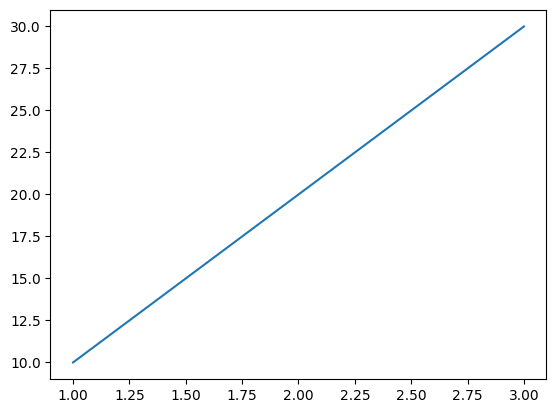

In [215]:
exec(function_call)

In [216]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_clown_face(face_color='yellow', eye_color='black', 
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, and color can be customized. 
    """
    # Constants
    face_radius = 0.4
    nose_radius = 0.1
    nose_x, nose_y = 0.5, 0.5
    mouth_x, mouth_y = 0.5, 0.3
    mouth_color = 'black'
    eye_size = 0.05
    mouth_size = (0.3, 0.1)
    eye_offset=(0.15, 0.15)
    mouth_theta = (200, 340)

    fig, ax = plt.subplots()
    # Face
    face = patches.Circle((0.5, 0.5), face_radius, color=face_color, fill=True)
    ax.add_patch(face)
    # Eyes
    eye_left = patches.Circle((0.5-eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    eye_right = patches.Circle((0.5+eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    ax.add_patch(eye_left)
    ax.add_patch(eye_right)
    # Nose
    nose = patches.Circle((nose_x, nose_y), nose_radius, color=nose_color, fill=True)
    ax.add_patch(nose)
    # Mouth
    mouth = patches.Arc((mouth_x, mouth_y), mouth_size[0], mouth_size[1], angle=0, 
                        theta1=mouth_theta[0], theta2=mouth_theta[1], color=mouth_color, linewidth=2)
    ax.add_patch(mouth)
    # Setting aspect ratio to 'equal' to ensure the face is circular
    ax.set_aspect('equal')
    # Remove axes
    ax.axis('off')
    plt.show()

In [217]:
USER_QUERY = \
"Hey can you draw a light-blue clown face with a black nose white eyes" 

raven_prompt = \
'''
Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: {query}<human_end>
'''
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)


draw_clown_face(face_color='lightblue', nose_color='black', eye_color='white')


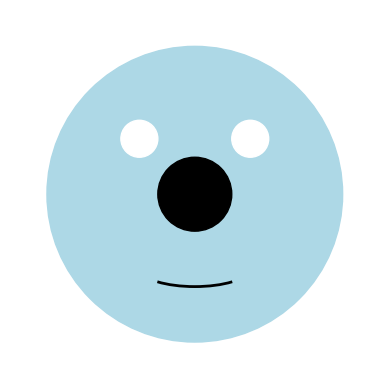

In [218]:
from _utils import query_raven
raven_call = query_raven(raven_prompt_with_query)
print (raven_call)
exec(raven_call)

# PART 2

In [223]:
import requests

url = "https://v2.jokeapi.dev/joke/Any?safe-mode&type=twopart"

response = requests.get(url)

print(response.json()["setup"])
print(response.json()["delivery"])

"99.9% of the people are dumb!"
"Fortunately I belong to the remaining 1%"


In [224]:
import requests
def give_joke(category : str):
    """
    Joke categories. Supports: Any, Misc, Programming, Pun, Spooky, Christmas.
    """

    url = f"https://v2.jokeapi.dev/joke/{category}?safe-mode&type=twopart"
    response = requests.get(url)
    print(response.json()["setup"])
    print(response.json()["delivery"])

In [228]:
USER_QUERY = "Hey! Can you get me a joke for this january?"

In [229]:
from _utils import query_raven

raven_functions = \
f'''
def give_joke(category : str):
    """
    Joke categories. Supports: Any, Misc, Programming, Dark, Pun, Spooky, Christmas.
    """

User Query: {USER_QUERY}<human_end>
'''
call = query_raven(raven_functions)

In [230]:
exec(call)

What's Santa's favourite type of music?
Wrap!


In [234]:
text = \
"""
John Doe lives at 123 Elm Street, Springfield. Next to him is Jane Smith, residing at 456 Oak Avenue, Lakeview. Not far away, we find Dr. Emily Ryan at 789 Pine Road, Westwood. Meanwhile, in a different part of town, Mr. Alan Turing can be found at 101 Binary Blvd, Computerville. Nearby, Ms. Olivia Newton stays at 202 Music Lane, Harmony. Also, Prof. Charles Xavier is located at 505 Mutant Circle, X-Town.
"""
pp.pprint (text)

('\n'
 'John Doe lives at 123 Elm Street, Springfield. Next to him is Jane Smith, '
 'residing at 456 Oak Avenue, Lakeview. Not far away, we find Dr. Emily Ryan '
 'at 789 Pine Road, Westwood. Meanwhile, in a different part of town, Mr. Alan '
 'Turing can be found at 101 Binary Blvd, Computerville. Nearby, Ms. Olivia '
 'Newton stays at 202 Music Lane, Harmony. Also, Prof. Charles Xavier is '
 'located at 505 Mutant Circle, X-Town.\n')


In [235]:
raven_prompt = \
f'''
Function:
def address_name_pairs(names : list[str], addresses : list[str]):
"""
Give names and associated addresses.
"""

{text}<human_end>
'''

In [236]:
def address_name_pairs(names : list[str], addresses : list[str]):
  """
  Give names and associated addresses.
  """
  for name, addr in zip(names, addresses):
    print (name, ": ", addr)

result = query_raven(raven_prompt)
eval(result)

John Doe :  123 Elm Street, Springfield
Jane Smith :  456 Oak Avenue, Lakeview
Dr. Emily Ryan :  789 Pine Road, Westwood
Mr. Alan Turing :  101 Binary Blvd, Computerville
Ms. Olivia Newton :  202 Music Lane, Harmony
Prof. Charles Xavier :  505 Mutant Circle, X-Town


# FOR KO

In [247]:
text = "1.in sap server the login issue are still there,2.and azure cloud not able to response, 3.in aws the user are not able to login"
raven_prompt = \
f'''
Function:
def query_applicatoin_pair(queries : list[str], apps : list[str]):
"""
Give names and associated addresses.
"""

{text}<human_end>
'''

def query_applicatoin_pair(queries,apps):
    for query, app in zip(queries, apps):
        print (query, ": ", app)
result = query_raven(raven_prompt)
exec(result)


in sap server the login issue are still there :  sap
and azure cloud not able to response :  azure
in aws the user are not able to login :  aws


# USING DATACLASSES

In [248]:
unbalanced_text = \
"""
Dr. Susan Hill has a practice at 120 Green Road, Evergreen City, and also consults at 450 Riverdale Drive, Brookside. Mark Twain, the renowned author, once lived at 300 Maple Street, Springfield, but now resides at 200 Writers Block, Literaryville. The famous artist, Emily Carter, showcases her work at 789 Artisan Alley, Paintown, and has a studio at 101 Palette Place, Creativeland. Meanwhile, the tech innovator, John Tech, has his main office at 555 Silicon Street, Techville, and a secondary office at 777 Data Drive, Computown, but he lives at 123 Digital Domain, Innovatown.
"""
pp.pprint (unbalanced_text)

('\n'
 'Dr. Susan Hill has a practice at 120 Green Road, Evergreen City, and also '
 'consults at 450 Riverdale Drive, Brookside. Mark Twain, the renowned author, '
 'once lived at 300 Maple Street, Springfield, but now resides at 200 Writers '
 'Block, Literaryville. The famous artist, Emily Carter, showcases her work at '
 '789 Artisan Alley, Paintown, and has a studio at 101 Palette Place, '
 'Creativeland. Meanwhile, the tech innovator, John Tech, has his main office '
 'at 555 Silicon Street, Techville, and a secondary office at 777 Data Drive, '
 'Computown, but he lives at 123 Digital Domain, Innovatown.\n')


In [249]:
raven_prompt = \
f'''

@dataclass
class Record:
    name : str
    addresses : List[str]

Function:
def insert_into_database(names : List[Record]):
"""
Inserts the records into the database. 
"""

{unbalanced_text}<human_end>

'''

result = query_raven(raven_prompt)
print (result)


insert_into_database(names=[Record(name='Dr. Susan Hill', addresses=['120 Green Road', '450 Riverdale Drive']), Record(name='Mark Twain', addresses=['300 Maple Street', '200 Writers Block']), Record(name='Emily Carter', addresses=['789 Artisan Alley', '101 Palette Place']), Record(name='John Tech', addresses=['555 Silicon Street', '777 Data Drive', '123 Digital Domain'])])


In [250]:
pp.pprint (result)

("insert_into_database(names=[Record(name='Dr. Susan Hill', addresses=['120 "
 "Green Road', '450 Riverdale Drive']), Record(name='Mark Twain', "
 "addresses=['300 Maple Street', '200 Writers Block']), Record(name='Emily "
 "Carter', addresses=['789 Artisan Alley', '101 Palette Place']), "
 "Record(name='John Tech', addresses=['555 Silicon Street', '777 Data Drive', "
 "'123 Digital Domain'])])")


In [251]:
def city_info(city_name : str, location : dict):
  """
  Gets the city info
  """
  return locals()
def construct_location_dict(country : str, continent : dict):
  """
  Provides the location dictionary
  """
  return locals()
def construct_continent_dict(simple_name : str, other_name : str):
  """
  Provides the continent dict
  """
  return locals()

In [252]:
print (city_info("London", {}))

{'city_name': 'London', 'location': {}}


In [254]:
raven_prompt = \
'''
Function:
def city_info(city_name : str, location : dict):
"""
Gets the city info
"""

Function:
def construct_location_dict(country : str, continent : dict):
"""
Provides the location dictionary
"""

def construct_continent_dict(simple_name : str, other_name : str):
"""
Provides the continent dict
"""

User Query: {question}<human_end>
'''

In [257]:
question = "I want the city info for London, "\
"which is in the United Kingdom, which is in Europe or Afro-Eur-Asia."

output = query_raven(raven_prompt.format(question = question))
json0 = eval(output)
print (output)

city_info(city_name='London', location=construct_location_dict(country='United Kingdom', continent=construct_continent_dict(simple_name='Europe', other_name='Afro-Eur-Asia')))


In [258]:
import json
json.dumps(json0)

'{"city_name": "London", "location": {"country": "United Kingdom", "continent": {"simple_name": "Europe", "other_name": "Afro-Eur-Asia"}}}'

In [259]:
question = "I need details for the city of Tokyo, "\
"situated in Japan, a part of the Asian continent, "\
"which is sometimes referred to as Eurasia."

output = query_raven(raven_prompt.format(question = question))
json1 = eval(output)
print (json1)

{'city_name': 'Tokyo', 'location': {'country': 'Japan', 'continent': {'simple_name': 'Asian', 'other_name': 'Eurasia'}}}


# ADD WEB SEARCH

In [260]:
from _utils import query_raven
question = "Hey, can you tell me more about this R1 thing that was announced by Rabbit? "

no_function_calling_prompt = \
f"""
<s> [INST] {question} [/INST]
"""
query_raven(no_function_calling_prompt)

'I\'m sorry, but I don\'t have any information about a specific "R1" thing that was announced by Rabbit. It\'s possible that you may have misspoken or misunderstood the information you received. If you could provide more context or clarify your question, I would be happy to try and help you.'

In [261]:
import os

def do_web_search(full_user_prompt : str, num_results : int = 5):
    API_URL = f'{os.getenv("DLAI_TAVILY_BASE_URL", "https://api.tavily.com")}/search'
    payload = \
    {
      "api_key": os.environ["TAVILY_API_KEY"],
      "query": full_user_prompt,
      "search_depth": "basic",
      "include_answer": False,
      "include_images": False,
      "include_raw_content": False,
      "max_results": num_results,
      "include_domains": [],
      "exclude_domains": []
    }
    import requests
    response = requests.post(API_URL, json=payload)
    response = response.json()
    all_results = "\n\n".join(item["content"] for item in response["results"])
    return all_results

In [262]:
function_calling_prompt = \
"""
Function:
def do_web_search(full_user_prompt : str, num_results : int = 5):
    '''
    Searches the web for the user question.
    '''

Example:
User Query: What is the oldest capital in the world?
Call: do_web_search(full_user_prompt="oldest capital")

User Query: {query}<human_end>
"""
fc_result = query_raven(function_calling_prompt.format(query=question))
print (fc_result)

do_web_search(full_user_prompt='R1 thing')


In [264]:
# result = eval(fc_result)

# HANDS ON

In [283]:
from duckduckgo_search import DDGS
def latest_news(topic:str):
        '''
        search google for news realted to given topic
        '''
        results = DDGS().text("latest news on :"+topic, max_results=1)
        return results

def complext_number_addition(a:int,a_i:int,b:int,b_i:int):
        '''
        used for the addtion of the two complex numbers
        '''
        return f"{a+b}+{a_i+b_i}i"
        

In [284]:
function_calling_prompt = """

Function:
def latest_news(topic:str):
    '''
    search google for news realted to given topic
    '''

Example:
User Query: what are the latest update on isreal-palestine?
Call: latest_news(topic="what are the latest update on isreal-palestine")
    


Function:
def complext_number_addition(a:int,a_i:int,b:int,b_i:int):
    '''
    used for the addtion of the two complex numbers
    '''

Example:
User Query: addition of two complex numbers: 4+5i and 3+7i?
Call: complext_number_addition(a=4,a_i=5,b=3,b_i=7)
    

User Query: {query}<human_end>
"""

In [285]:
question ="what is the sum of 3+1i and 9+3i"
# question ="latest news on russia ukrain war?"
fc_result = query_raven(function_calling_prompt.format(query=question))

In [286]:
print(eval(fc_result))

12+4i


In [278]:
fc_result

"latest_news(topic='latest news on russia ukrain war')"

# Project

In [287]:
sample_data = \
"""Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?\nCustomer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?\nAgent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?\nCustomer: My registered mobile number is +1 123-456-7890.\nAgent: Thank you. Let me check that for you. I'm sorry to inform you that we don't have this number on our records. Can you please confirm if this is the correct number?\nCustomer: Oh, I'm sorry. I might have registered with a different number. Can you please check with my email address instead? It's johndoe@email.com.\nAgent: Sure, let me check that for you. (After a few moments) I see that we have your email address on our records. We'll be sending you a verification code shortly. Please check your email and let me know once you receive it. Customer: Okay, I received the code. What do I do with it?\nAgent: Please enter the verification code in the field provided and click on 'Verify'. Once your email address is verified, you'll be able to proceed with your purchase.\nCustomer: Okay, I entered the code, and it's verified now. Thank you for your help.\nAgent: You're welcome. Is there anything else I can assist you with?\nCustomer: No, that's all. Thank you.\nAgent: You're welcome. Have a great day!"""

In [288]:
print (sample_data)

Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?
Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?
Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?
Customer: My registered mobile number is +1 123-456-7890.
Agent: Thank you. Let me check that for you. I'm sorry to inform you that we don't have this number on our records. Can you please confirm if this is the correct number?
Customer: Oh, I'm sorry. I might have registered with a different number. Can you please check with my email address instead? It's johndoe@email.com.
Agent: Sure, let me check that for you. (After a few moments) I see that we have your email address on our records. We'll be sending you a verification code shortly. Please check your email and let me know once 

In [290]:
from _utils import query_raven
from typing import List
from dataclasses import dataclass
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [291]:
schema_id = ("agent_name", "customer_email", \
             "customer_order", "customer_phone", "customer_sentiment")

dataclass_schema_representation = '''
@dataclass
class Record:
    agent_name : str # The agent name
    customer_email : str # customer email if provided, else ''
    customer_order : str # The customer order number if provided, else ''
    customer_phone : str # the customer phone number if provided, else ''
    customer_sentiment : str # Overall customer sentiment, either 'frustrated', or 'happy'. Always MUST have a value.
'''

exec(dataclass_schema_representation)


In [292]:
def initialize_db():
    import sqlite3

    conn = sqlite3.connect('extracted.db')
    cursor = conn.cursor()

    table_name = "customer_information"

    columns = """
    id INTEGER PRIMARY KEY, 
    agent_name TEXT, 
    customer_email TEXT, 
    customer_order TEXT, 
    customer_phone TEXT, 
    customer_sentiment TEXT
    """

    quoted_table_name = f'"{table_name}"'

    cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name={quoted_table_name}")
    if cursor.fetchone():
        print(f"Table {table_name} already exists.")
    else:
        cursor.execute(f'''CREATE TABLE {quoted_table_name} ({columns})''')
        print(f"Table {table_name} created successfully.")

    conn.commit()
    conn.close()

In [293]:
initialize_db()

Table customer_information created successfully.


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [310]:
@dataclass
class Record:
    agent_name: str
    customer_email: str
    customer_order: str
    customer_phone: str
    customer_sentiment: str

In [311]:
from dataclasses import dataclass, fields
def update_knowledge(results_list : List[Record]):
    """
    Registers the information necessary
    """
    import sqlite3
    from sqlite3 import ProgrammingError

    conn = sqlite3.connect('extracted.db')
    cursor = conn.cursor()

    table_name = "customer_information"

    column_names = "agent_name, customer_email, customer_order, customer_phone, customer_sentiment"
    placeholders = ", ".join(["?"] * 5) 
    sql = f"INSERT INTO {table_name} ({column_names}) VALUES ({placeholders})"

    for record in results_list:
        try:
            record_values = tuple(getattr(record, f.name) for f in fields(record))
            cursor.execute(sql, record_values)
        except ProgrammingError as e:
            print(f"Error with record. {e}")
            continue

    conn.commit()
    conn.close()
    print("Records inserted successfully.")

In [312]:
my_record = Record(agent_name = "Agent Smith", \
                   customer_email = "", customer_order = "12346", \
                   customer_phone = "", customer_sentiment = "happy")

In [313]:
update_knowledge([my_record])

Records inserted successfully.


In [314]:
import sqlite3
def execute_sql(sql: str):
    """ Runs SQL code for the given schema. Make sure to properly leverage the schema to answer the user's question in the best way possible. """
    table_name = "customer_information"

    conn = sqlite3.connect('extracted.db')
    cursor = conn.cursor()

    cursor.execute(sql)

    results = []

    results = cursor.fetchall()
    print("Query operation executed successfully. Number of rows returned:", len(results))

    conn.close()
    return results


In [315]:
sql = '''
    SELECT agent_name 
        FROM customer_information
        WHERE customer_sentiment = "happy"
    '''
# Print the final SQL command for debugging
print("Executing SQL:", sql)

execute_sql(sql)

Executing SQL: 
    SELECT agent_name 
        FROM customer_information
        WHERE customer_sentiment = "happy"
    
Query operation executed successfully. Number of rows returned: 1


[('Agent Smith',)]

In [319]:
from datasets import load_dataset
import os

cwd = os.getcwd()
dialogue_data = load_dataset("SantiagoPG/customer_service_chatbot", cache_dir="./cache")["train"]

Generating train split: 100%|██████████| 1000/1000 [00:00<00:00, 20289.59 examples/s]


In [326]:
sample_zero = dialogue_data[195]
dialogue_string = sample_zero["conversation"].replace("\n\n", "\n")
print (dialogue_string)

Agent: Hello, thank you for contacting BrownBox customer support. My name is Rachel, how may I assist you today?
Customer: Hi Rachel, I am calling about an issue with my external hard disk. I received the invoice for my purchase, and I noticed that I have been overcharged for the product.
Agent: I'm sorry to hear that, and I understand your frustration. May I please have your order number and registered email address so that I can check the details and assist you further?
Customer: Sure, my order number is BB789012, and my registered email address is janedoe@email.com.
Agent: Thank you, Jane. I can see that the invoice shows a higher amount than the actual price of the product. I apologize for the inconvenience caused. Let me quickly check the status of your order and see what we can do to resolve this issue.
(Customer is put on hold for a minute)
Agent: Thank you for your patience, Jane. I have checked the details, and I see that there was a billing discrepancy for your order. I'm sor

In [327]:
import inspect

prompt = "\n" + dialogue_string

signature = inspect.signature(update_knowledge)
signature = str(signature).replace("__main__.Record", "Record")
docstring = update_knowledge.__doc__

raven_prompt = f'''{dataclass_schema_representation}\nFunction:\n{update_knowledge.__name__}{signature}\n    """{docstring}"""\n\n\nUser Query:{prompt}<human_end>'''
print (raven_prompt)


@dataclass
class Record:
    agent_name : str # The agent name
    customer_email : str # customer email if provided, else ''
    customer_order : str # The customer order number if provided, else ''
    customer_phone : str # the customer phone number if provided, else ''
    customer_sentiment : str # Overall customer sentiment, either 'frustrated', or 'happy'. Always MUST have a value.

Function:
update_knowledge(results_list: List[Record])
    """
    Registers the information necessary
    """


User Query:
Agent: Hello, thank you for contacting BrownBox customer support. My name is Rachel, how may I assist you today?
Customer: Hi Rachel, I am calling about an issue with my external hard disk. I received the invoice for my purchase, and I noticed that I have been overcharged for the product.
Agent: I'm sorry to hear that, and I understand your frustration. May I please have your order number and registered email address so that I can check the details and assist you further?
Cust

In [332]:
raven_call = query_raven(raven_prompt)
print (raven_call)

update_knowledge(results_list=[Record(agent_name='Rachel', customer_email='janedoe@email.com', customer_order='BB789012', customer_phone='', customer_sentiment='frustrated')])


In [333]:
exec(raven_call)

Records inserted successfully.


In [337]:
execute_sql(
    '''
    SELECT COUNT(customer_sentiment) 
    FROM customer_information
    WHERE agent_name = "Rachel"
    ''')

Query operation executed successfully. Number of rows returned: 1


[(1,)]

In [339]:
prompt = "how many customers Rachel has made happy."

signature = inspect.signature(execute_sql)

docstring = execute_sql.__doc__

sql_schema_representation = \
"""
CREATE TABLE customer_information (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    agent_name TEXT,
    customer_email TEXT,
    customer_order TEXT,
    customer_phone TEXT,
    customer_sentiment TEXT
);
"""

raven_prompt = f'''{sql_schema_representation}\nFunction:\n{execute_sql.__name__}{signature}\n    """{docstring}"""\n\n\nUser Query:{prompt}<human_end>'''

print (raven_prompt)


CREATE TABLE customer_information (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    agent_name TEXT,
    customer_email TEXT,
    customer_order TEXT,
    customer_phone TEXT,
    customer_sentiment TEXT
);

Function:
execute_sql(sql: str)
    """ Runs SQL code for the given schema. Make sure to properly leverage the schema to answer the user's question in the best way possible. """


User Query:how many customers Rachel has made happy.<human_end>


In [340]:
raven_call = query_raven(raven_prompt)

print (raven_call)

execute_sql(sql='SELECT COUNT(customer_sentiment) FROM customer_information WHERE customer_sentiment = "happy"')


In [341]:
eval(raven_call)

Query operation executed successfully. Number of rows returned: 1


[(1,)]

In [342]:
from tqdm import tqdm

for i in tqdm(range(0, 10)):
    data = dialogue_data[i]
    dialogue_string = data["conversation"].replace("\n\n", "\n")
    
    # Ask Raven to extract the information we want out of this dialogue. 
    prompt = "\n" + dialogue_string
    signature = inspect.signature(update_knowledge)
    docstring = update_knowledge.__doc__
    raven_prompt = f'''{dataclass_schema_representation}\nFunction:\n{update_knowledge.__name__}{signature}\n    """{docstring}"""\n\n\nUser Query:{prompt}<human_end>'''
    raven_call = query_raven(raven_prompt)
    print (raven_call)
    exec(raven_call)

 10%|█         | 1/10 [00:02<00:23,  2.58s/it]

update_knowledge(results_list=[Record(agent_name='Tom', customer_email='johndoe@email.com', customer_order='', customer_phone='+1 123-456-7890', customer_sentiment='happy')])
Records inserted successfully.


 20%|██        | 2/10 [00:04<00:19,  2.44s/it]

update_knowledge(results_list=[Record(agent_name='Alex', customer_email='', customer_order='789101', customer_phone='', customer_sentiment='happy')])
Records inserted successfully.


 30%|███       | 3/10 [00:07<00:17,  2.48s/it]

update_knowledge(results_list=[Record(agent_name='Sarah', customer_email='jane.doe@email.com', customer_order='987654', customer_phone='', customer_sentiment='happy')])
Records inserted successfully.


 40%|████      | 4/10 [00:10<00:15,  2.60s/it]

update_knowledge(results_list=[Record(agent_name='BrownBox', customer_email='john.doe@gmail.com', customer_order='BB98765432', customer_phone='123-456-7890', customer_sentiment='happy')])
Records inserted successfully.


 50%|█████     | 5/10 [00:12<00:12,  2.52s/it]

update_knowledge(results_list=[Record(agent_name='Sarah', customer_email='', customer_order='BB123456', customer_phone='', customer_sentiment='frustrated')])
Records inserted successfully.


 60%|██████    | 6/10 [00:15<00:10,  2.53s/it]

update_knowledge(results_list=[Record(agent_name='Alex', customer_email='johnsmith@email.com', customer_order='', customer_phone='123-456-7890', customer_sentiment='happy')])
Records inserted successfully.


 70%|███████   | 7/10 [00:17<00:07,  2.46s/it]

update_knowledge(results_list=[Record(agent_name='Alex', customer_email='', customer_order='12345', customer_phone='', customer_sentiment='frustrated')])
Records inserted successfully.


 80%|████████  | 8/10 [00:19<00:04,  2.36s/it]

update_knowledge(results_list=[Record(agent_name='Rachel', customer_email='', customer_order='', customer_phone='', customer_sentiment='happy')])
Records inserted successfully.


 90%|█████████ | 9/10 [00:21<00:02,  2.30s/it]

update_knowledge(results_list=[Record(agent_name='Sarah', customer_email='', customer_order='#98765', customer_phone='', customer_sentiment='happy')])
Records inserted successfully.


100%|██████████| 10/10 [00:24<00:00,  2.44s/it]

update_knowledge(results_list=[Record(agent_name='Sarah', customer_email='jane@email.com', customer_order='', customer_phone='9876543210', customer_sentiment='frustrated')])
Records inserted successfully.


In [343]:
signature = inspect.signature(execute_sql)

docstring = execute_sql.__doc__

schema_representation = \
"""
CREATE TABLE customer_information (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    agent_name TEXT,
    customer_email TEXT,
    customer_order TEXT,
    customer_phone TEXT,
    customer_sentiment TEXT
);
"""

raven_prompt = f'''{schema_representation}\nFunction:\n{execute_sql.__name__}{signature}\n    """{docstring}"""\n\n\n'''
raven_prompt = raven_prompt + "User Query: How many happy customers?<human_end>"
print (raven_prompt)
raven_call = query_raven(raven_prompt)

print (raven_call)



CREATE TABLE customer_information (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    agent_name TEXT,
    customer_email TEXT,
    customer_order TEXT,
    customer_phone TEXT,
    customer_sentiment TEXT
);

Function:
execute_sql(sql: str)
    """ Runs SQL code for the given schema. Make sure to properly leverage the schema to answer the user's question in the best way possible. """


User Query: How many happy customers?<human_end>
execute_sql(sql='SELECT COUNT(*) FROM customer_information WHERE customer_sentiment = "happy";')


In [344]:
eval(raven_call)

Query operation executed successfully. Number of rows returned: 1


[(8,)]

In [345]:
raven_prompt = f'''{schema_representation}\nFunction:\n{execute_sql.__name__}{signature}\n    """{docstring}"""\n\n\n'''
raven_prompt = raven_prompt + \
"User Query: Give me the names and phone numbers of the ones"\
"who are frustrated and the order numbers?<human_end>"

print (raven_prompt)
raven_call = query_raven(raven_prompt)

print (raven_call)
eval(raven_call)


CREATE TABLE customer_information (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    agent_name TEXT,
    customer_email TEXT,
    customer_order TEXT,
    customer_phone TEXT,
    customer_sentiment TEXT
);

Function:
execute_sql(sql: str)
    """ Runs SQL code for the given schema. Make sure to properly leverage the schema to answer the user's question in the best way possible. """


User Query: Give me the names and phone numbers of the oneswho are frustrated and the order numbers?<human_end>
execute_sql(sql='SELECT agent_name, customer_phone, customer_order FROM customer_information WHERE customer_sentiment = "frustrated";')
Query operation executed successfully. Number of rows returned: 4


[('Rachel', '', 'BB789012'),
 ('Sarah', '', 'BB123456'),
 ('Alex', '', '12345'),
 ('Sarah', '9876543210', '')]